In [2]:
import time
import tracemalloc
import random

def complex_computation(x):
    result = 0
    for i in range(1, x):
        result += (i ** 2) / (i + 1)
    return result

def stress_test(num_iterations, max_x):
    timings = []
    memory_usages = []

    for _ in range(num_iterations):
        x = random.randint(1, max_x)

        # Start memory profiling
        tracemalloc.start()

        # Time the function call
        start_time = time.time()
        result = complex_computation(x)
        end_time = time.time()

        # Measure memory usage
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        # Log time and memory usage
        timings.append(end_time - start_time)
        memory_usages.append(peak)

    return timings, memory_usages

# Parameters
num_iterations = 1000
max_x = 10000

# Run the stress test
timings, memory_usages = stress_test(num_iterations, max_x)

# Print results
print(f"Average time per call: {sum(timings) / num_iterations:.6f} seconds")
print(f"Average peak memory usage: {sum(memory_usages) / num_iterations / 1024:.2f} KB")


Average time per call: 0.012123 seconds
Average peak memory usage: 1.08 KB


Average time per call (first computation): 0.025082 seconds
Average peak memory usage (first computation): 1.99 KB
Average time per call (second computation): 0.014826 seconds
Average peak memory usage (second computation): 1.17 KB


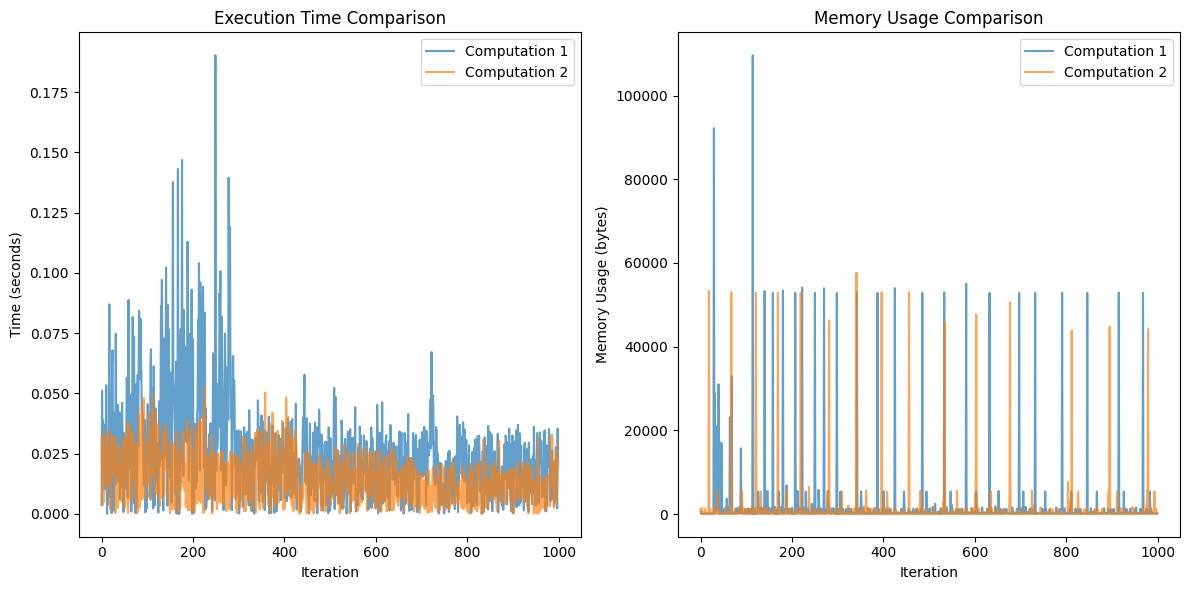

In [1]:
import time
import tracemalloc
import random
import matplotlib.pyplot as plt

def complex_computation(x):
    result = 0
    for i in range(1, x):
        result += (i ** 2) / (i + 1)
    return result

def stress_test(num_iterations, max_x, computation_func):
    timings = []
    memory_usages = []

    for _ in range(num_iterations):
        x = random.randint(1, max_x)

        # Start memory profiling
        tracemalloc.start()

        # Time the function call
        start_time = time.time()
        result = computation_func(x)
        end_time = time.time()

        # Measure memory usage
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()

        # Log time and memory usage
        timings.append(end_time - start_time)
        memory_usages.append(peak)

    return timings, memory_usages

# Parameters
num_iterations = 1000
max_x = 10000

# Run the stress test for two different functions or approaches
timings_1, memory_usages_1 = stress_test(num_iterations, max_x, complex_computation)
timings_2, memory_usages_2 = stress_test(num_iterations, max_x, complex_computation)  # You can swap with another function if needed

# Print results for both computations
print(f"Average time per call (first computation): {sum(timings_1) / num_iterations:.6f} seconds")
print(f"Average peak memory usage (first computation): {sum(memory_usages_1) / num_iterations / 1024:.2f} KB")
print(f"Average time per call (second computation): {sum(timings_2) / num_iterations:.6f} seconds")
print(f"Average peak memory usage (second computation): {sum(memory_usages_2) / num_iterations / 1024:.2f} KB")

# Plot the results over time
plt.figure(figsize=(12, 6))

# Time comparison plot
plt.subplot(1, 2, 1)
plt.plot(timings_1, label="Computation 1", alpha=0.7)
plt.plot(timings_2, label="Computation 2", alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()

# Memory usage comparison plot
plt.subplot(1, 2, 2)
plt.plot(memory_usages_1, label="Computation 1", alpha=0.7)
plt.plot(memory_usages_2, label="Computation 2", alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage Comparison')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
